# So you want to make a killer app?
# Well then what kind of app should it be?  Which category should it be in?  Should you settle for throwing together a free app?  Should you take time making a good paid app, or will the price scare people away?
## In this project, we will analyze data from the Google Play App Store.
## We will use use Pandas to make dataframes from two csv files:
## 1. app data
## 2. user review data
## Thereafter we will determine what questions we can answer using the data we have.
## We will determine what limitations our data has based on what we want to ask and what data we have, and how to work around these limitations via data-cleansing.
## Finally, we will use Matplotlib to produce visuals to display our findings.

## Visualization Ideas:

Compare something about each category on multiple line graphs / scatter plots
https://python-graph-gallery.com/125-small-multiples-for-line-chart/
https://python-graph-gallery.com/199-matplotlib-style-sheets/
https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
https://python-graph-gallery.com/111-custom-correlogram/
https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/
https://python-graph-gallery.com/242-area-chart-and-faceting/
http://python-graph-gallery.com/242-area-chart-and-faceting/

3-Dimensional graphs
https://python-graph-gallery.com/372-3d-pca-result/
https://python-graph-gallery.com/370-3d-scatterplot/
https://python-graph-gallery.com/371-surface-plot/
https://python-graph-gallery.com/342-animation-on-3d-plot/
https://python-graph-gallery.com/312-add-markers-on-folium-map/

Animated Graphs
https://python-graph-gallery.com/341-python-gapminder-animation/ - Change per category, change per number of times downloaded bins? Change per size? Change per price?
https://python-graph-gallery.com/340-scatterplot-animation/

Annotate Graph
https://python-graph-gallery.com/193-annotate-matplotlib-chart/

Multiple bars bar chart
https://python-graph-gallery.com/11-grouped-barplot/ - Comparing all apps vs only ones with rating?

Stacked barcharts- comparing all apps vs only ones with rating?
https://python-graph-gallery.com/13-percent-stacked-barplot/
https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib/
https://python-graph-gallery.com/11-grouped-barplot/
https://python-graph-gallery.com/10-barplot-with-number-of-observation/

Chord diagram
https://python-graph-gallery.com/231-chord-diagram-with-bokeh/

Word clouds- use with reviews dataframe?
http://python-graph-gallery.com/wordcloud/
https://python-graph-gallery.com/260-basic-wordcloud/
https://python-graph-gallery.com/261-custom-python-wordcloud/
https://python-graph-gallery.com/200-basic-treemap-with-python/
https://python-graph-gallery.com/201-control-the-color-of-treemap/

Multiple lines same chart
https://python-graph-gallery.com/122-multiple-lines-chart/

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from wordcloud import WordCloud

In [2]:
app_data = pd.read_csv("Data/google-play-store-apps/googleplaystore.csv")
review_data = pd.read_csv("Data/google-play-store-apps/googleplaystore_user_reviews.csv")

In [3]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
app_data[(app_data["Category"] == "SPORTS") & (app_data["Rating"] >= 4.5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2965,Onefootball - Soccer Scores,SPORTS,4.7,911995,20M,"10,000,000+",Free,0,Everyone,Sports,"August 1, 2018",10.8.1.330,4.4 and up
2966,Cristiano Ronaldo Wallpaper,SPORTS,4.6,1733,19M,"500,000+",Free,0,Everyone,Sports,"July 17, 2018",2.1,4.1 and up
2970,Football Live Scores,SPORTS,4.5,107724,6.5M,"5,000,000+",Free,0,Everyone,Sports,"July 31, 2018",1004.0,4.0 and up
2971,Pro 2018 - Series A and B,SPORTS,4.6,101455,6.2M,"5,000,000+",Free,0,Everyone,Sports,"August 3, 2018",2.24.2.0,4.0.3 and up
2972,BeSoccer - Soccer Live Score,SPORTS,4.5,152780,Varies with device,"10,000,000+",Free,0,Everyone,Sports,"July 18, 2018",Varies with device,Varies with device
2974,FotMob - Live Soccer Scores,SPORTS,4.7,410384,Varies with device,"10,000,000+",Free,0,Everyone,Sports,"July 31, 2018",Varies with device,Varies with device
2982,All Football - Latest News & Videos,SPORTS,4.6,152867,17M,"10,000,000+",Free,0,Everyone,Sports,"August 3, 2018",3.0.5,4.1 and up
2987,"All Football GO- Live Score, Games",SPORTS,4.6,1981,10M,"100,000+",Free,0,Everyone,Sports,"June 21, 2018",2.9.9go,4.1 and up
2993,World Cup 2018,SPORTS,4.6,4011,2.6M,"500,000+",Free,0,Teen,Sports,"July 1, 2018",1.0.16,2.3 and up
2994,GollerCepte 1903,SPORTS,4.7,25172,30M,"500,000+",Free,0,Everyone,Sports,"May 23, 2018",5.5,4.1 and up


In [5]:
print(app_data.shape)
app_data.count()

(10841, 13)


App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [6]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
print(review_data.shape)
review_data.count()

(64295, 5)


App                       64295
Translated_Review         37427
Sentiment                 37432
Sentiment_Polarity        37432
Sentiment_Subjectivity    37432
dtype: int64

In [8]:
categories = app_data["Category"].unique()
average_rating_by_category = app_data.groupby("Category")["Rating"].mean()

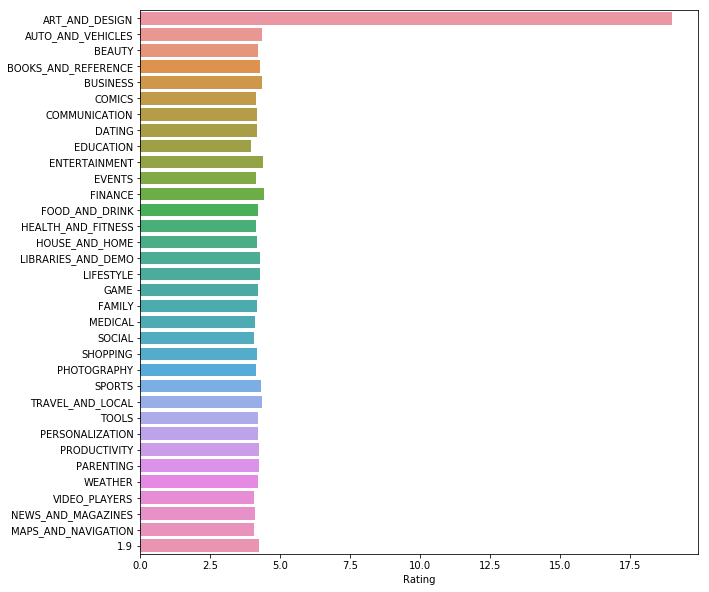

In [9]:
plt.subplots(figsize=(10,10))
sns.barplot(average_rating_by_category, categories, orient="h")
plt.show()

### Interesting, what is that 1.9 category?

In [10]:
app_data[app_data["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
categories_19_dropped = app_data[app_data["Category"] != "1.9"]["Category"].unique()
average_rating_by_category_19_dropped = app_data[app_data["Category"] != "1.9"].groupby("Category")["Rating"].mean()

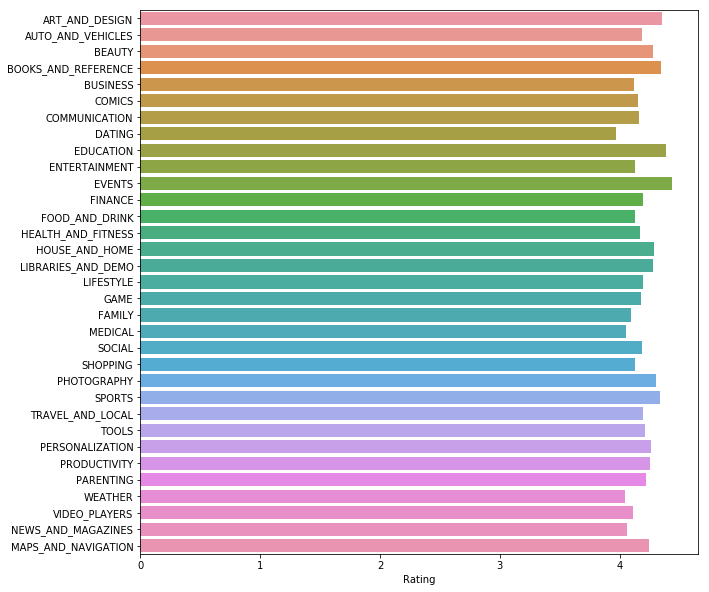

In [12]:
plt.subplots(figsize=(10,10))
sns.barplot(average_rating_by_category_19_dropped, categories_19_dropped, orient="h")
plt.show()

### Right now it's still difficult to tell the difference between the average rating.  We will also adjust our axes to more accurately show the range of values.

In [13]:
average_rating_by_category_19_dropped_sorted = average_rating_by_category_19_dropped.sort_values()
categories_19_dropped_sorted_by_average_rating = average_rating_by_category_19_dropped_sorted.index

In [14]:
average_rating_by_category_19_dropped_sorted.head(1)

Category
DATING    3.970769
Name: Rating, dtype: float64

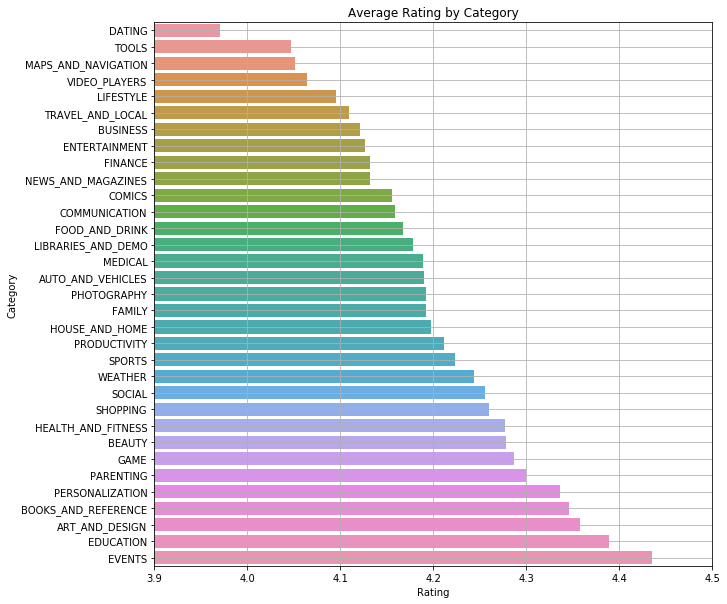

In [15]:
plt.subplots(figsize=(10,10))
bar_chart_average_rating_by_category = sns.barplot(average_rating_by_category_19_dropped_sorted, categories_19_dropped_sorted_by_average_rating, orient="h")
plt.title("Average Rating by Category")
bar_chart_average_rating_by_category.set(xlim=(3.9,4.5))
plt.grid()
plt.show()

In [16]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [69]:
key_words = []

stop_continue = "continue"
while stop_continue == "continue":
    key_word = input("Which keyword would you like to search for? ")
    key_words.append(key_word)
    print(f"Your key words are: {key_words}")
    user_answer = input("\nWould you like to add another keyword?\nType in the word \"stop\" to exit the process.\nOtherwise hit any key to continue. ")
    
    if user_answer == user_answer.lower() == "stop":
        stop_continue = "stop"
        
print(f"Your key words are: {key_words}")

Which keyword would you like to search for? awful
Your key words are: ['awful']

Would you like to add another keyword?
Type in the word "stop" to exit the process.
Otherwise hit any key to continue. stop
Your key words are: ['awful']


This program has two methods for forming word clouds.
In both methods the program will search each review for all key words.
If the keyword is found in a review at least once, the program will then:
1. Add only that keyword to a list, then create a word cloud showing the frequency of key words. 
2. Extract every word from that review, to analyze other words that appear with key words.
Please enter 1 to use the first method, or 2 to use the second method. 2


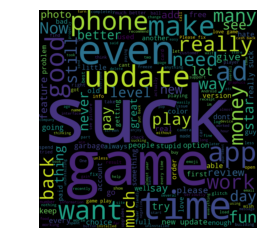

In [59]:
method_selection = input("This program has two methods for forming word clouds.\nIn both methods the program will search each review for all key words.\nIf the keyword is found in a review at least once, the program will then:\n1. Add only that keyword to a list, then create a word cloud showing the frequency of key words. \n2. Extract every word from that review, to analyze other words that appear with key words.\nPlease enter 1 to use the first method, or 2 to use the second method. ")

try:
    
    if int(method_selection) == 1:
        frequency_words_as_list = []

        for word in key_words:
            for review in review_data["Translated_Review"]:
                if str(word) in str(review):
                    frequency_words_as_list.append(word)

        frequency_words_as_string = ""

        for word in frequency_words_as_list:
            frequency_words_as_string += " " + str(frequency_words_as_list[frequency_words_as_list.index(word)])

        wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(frequency_words_as_string)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

    elif int(method_selection) == 2:
        review_words = ""

        for word in key_words:
            for review in review_data["Translated_Review"]:
                if word in str(review):
                    review_words += " " + str(review)

        wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(review_words)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
        
    else:
        print("It appears you gave an invalid input.  Please try again.")

except:
    print("It appears you gave an invalid input.  Please try again.")

# IDEA: Make a chart where you enter a key word and the program searches reviews for that keyword.  If a review finds that keyword, it determines whether the Sentinment column is set to Positive or Negative, and stores the results in two lists.  Thereafter is graphs a double bar chart to compare whether that keyword is more often negative or positive.

# BONUS: Try to find a way to enter more than one keywords and have each keyword plotted a double bar chart with a legend and any other important info for reading the graph.

In [ ]:
review_data["Sentiment"].unique()

In [46]:
positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

for sentiment in review_data["Sentiment"]:
    if sentiment == "Positive":
        positive_sentiments.append(sentiment)
    elif sentiment == "Negative":
        negative_sentiments.append(sentiment)
    elif sentiment == "Neutral":
        neutral_sentiments.append(sentiment)

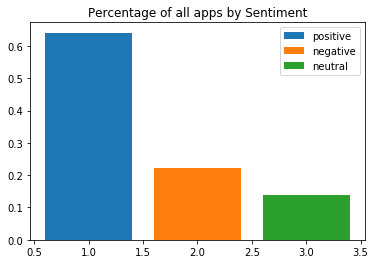

In [47]:
number_reviews_with_sentiment = len(review_data.dropna(subset=["Sentiment"]))

percent_positive = len(positive_sentiments) / number_reviews_with_sentiment
percent_neutral = len(neutral_sentiments) / number_reviews_with_sentiment
percent_negative = len(negative_sentiments) / number_reviews_with_sentiment

plt.bar(1,percent_positive, label="positive")
plt.bar(2, percent_negative, label="negative")
plt.bar(3, percent_neutral, label="neutral")
plt.title("Percentage of all apps by Sentiment")
plt.legend(loc="best")

In [43]:
print(percent_positive)
print(percent_negative)
print(percent_neutral)
print(percent_positive+percent_negative+percent_neutral)

0.04549583244282966
0.01837999572558239
0.004033981620004274
0.06790980978841633


In [24]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [36]:
review_data["Test"] = review_data["Translated_Review"] + review_data["Sentiment"]
review_data.iloc[0,5][-8:]

'Positive'

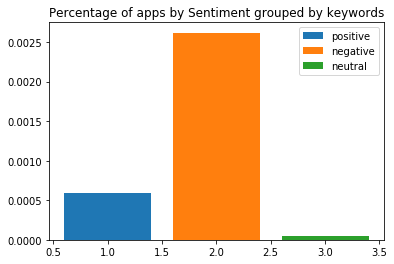

In [70]:
review_data["Review with Sentiment"] = review_data["Translated_Review"] + review_data["Sentiment"]

positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

for key_word in key_words:
    for row in review_data["Review with Sentiment"]:
        if str(key_word) in str(row):
            if row[-8:] == "Positive":
                positive_sentiments.append(sentiment)
            elif row[-8:] == "Negative":
                negative_sentiments.append(sentiment)
            elif row[-7:] == "Neutral":
                neutral_sentiments.append(sentiment)
                
number_reviews_with_sentiment = len(review_data.dropna(subset=["Sentiment"]))

percent_positive = 0
percent_neutral = 0
percent_negative = 0

percent_positive = len(positive_sentiments) / number_reviews_with_sentiment
percent_neutral = len(neutral_sentiments) / number_reviews_with_sentiment
percent_negative = len(negative_sentiments) / number_reviews_with_sentiment

plt.bar(1,percent_positive, label="positive")
plt.bar(2, percent_negative, label="negative")
plt.bar(3, percent_neutral, label="neutral")
plt.title("Percentage of apps by Sentiment grouped by keywords")
plt.legend(loc="best")

In [71]:
print(percent_positive*100)
print(percent_negative*100)
print(percent_neutral*100)
print(percent_positive+percent_negative+percent_neutral)

0.05877324214575764
0.26180807864928407
0.005343022013250694
0.003259243428082924


In [ ]:
# positive_sentiments = []
# negative_sentiments = []
# neutral_sentiments = []

# for key_word in key_words:
#     for review in review_data["Translated_Review"]:
#         if str(key_word) in str(review):
#             for sentiment in review_data["Sentiment"]:
#                 if str(review_data["Sentiment"]) == "Positive":
#                     positive_sentiments.append(" ")
#                 elif str(review_data["Sentiment"]) == "Negative":
#                     negative_sentiments.append(" ")
#                 elif str(review_data["Sentiment"]) == "Neutral":
#                     neutral_sentiments.append(" ")

#                 number_reviews_with_sentiment = len(review_data.dropna(subset=["Sentiment"]))

#                 percent_positive = len(positive_sentiments) / number_reviews_with_sentiment
#                 percent_neutral = len(neutral_sentiments) / number_reviews_with_sentiment
#                 percent_negative = len(negative_sentiments) / number_reviews_with_sentiment

#                 plt.bar(1,percent_positive, label="positive")
#                 plt.bar(2, percent_negative, label="negative")
#                 plt.bar(3, percent_neutral, label="neutral")
#                 plt.legend(loc="best")
    
# plt.show()